In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Saduto tuto,1975
1,Sawasdee Bangkok,2009
2,The Naked Hills,1956
3,Romance en Puerto Rico,1962
4,Indigo Home,2014


In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [11]:
c = cast[(cast.character=='Superman') | (cast.character=='Batman')].groupby(['year', 'character']).size().unstack().fillna(0)
sum(c['Superman']-c['Batman']>0)

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [13]:
sum(c['Superman']-c['Batman']<0)

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

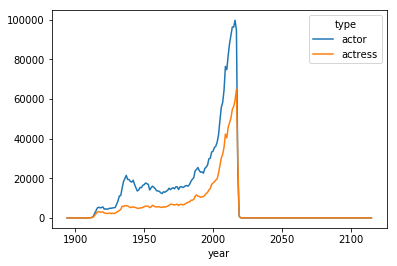

In [17]:
cast.groupby(['year', 'type']).size().unstack().fillna(0).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

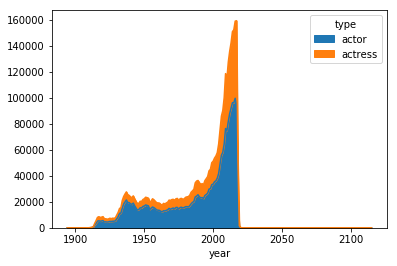

In [18]:
cast.groupby(['year', 'type']).size().unstack().fillna(0).plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

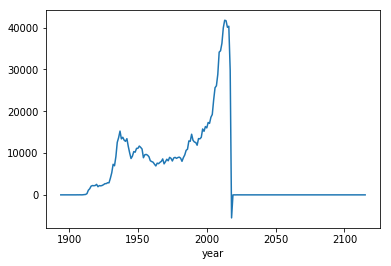

In [20]:
c = cast.groupby(['year', 'type']).size().unstack().fillna(0)
(c['actor']-c['actress']).plot()

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

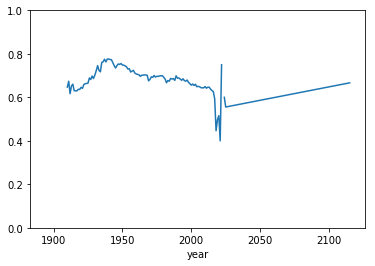

In [40]:
c = cast.groupby(['year', 'type']).size().unstack()
(c['actor']/(c['actress']+c['actor'])).plot(ylim=[0, 1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

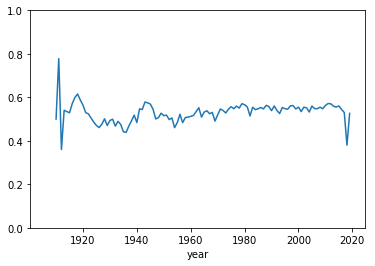

In [31]:
c = cast[cast.n==2].groupby(['year', 'type']).size().unstack()
(c['actor']/(c['actress']+c['actor'])).plot(ylim=[0, 1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

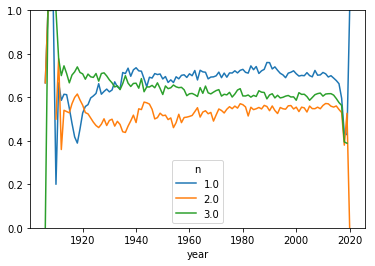

In [46]:
c=cast[cast.n<4].groupby(['year', 'n', 'type']).size().unstack().fillna(0)
r = (c['actor']/(c['actress']+c['actor']))
r.unstack('n').plot(ylim=[0, 1])